### Estuardo J. Díaz García
-----
# Laboratorio 3. Diabetes. Parte 3

## Modelo de clasificación K-vecinos

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [23]:
df_diabetes = pd.read_csv("diabetes.csv")
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [24]:
#categorías en Outcome 0 es no tiene diabetes, 1 es tiene diabetes
df_diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
df_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [28]:
#convertimos el dataframe de panda de X y Y en un arreglo de numpy
x = df_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df_diabetes["Outcome"]


In [29]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))


In [30]:
#Generamos el set de entrenamiento y el de testeo
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

print ('Set de Entrenamiento:', x_train.shape,  y_train.shape)
print ('Set de Prueba:', x_test.shape,  y_test.shape)

Set de Entrenamiento: (614, 8) (614,)
Set de Prueba: (154, 8) (154,)


In [31]:
k = 45 #el parámetro para ir calculando 

neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train) #Este el el modelo con sklearn


yhat = neigh.predict(x_test) #predecimos el test de prueba 


print("Entrenar el set de Certeza: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Probar el set de Certeza: ", metrics.accuracy_score(y_test, yhat))

Entrenar el set de Certeza:  0.7719869706840391
Probar el set de Certeza:  0.7727272727272727


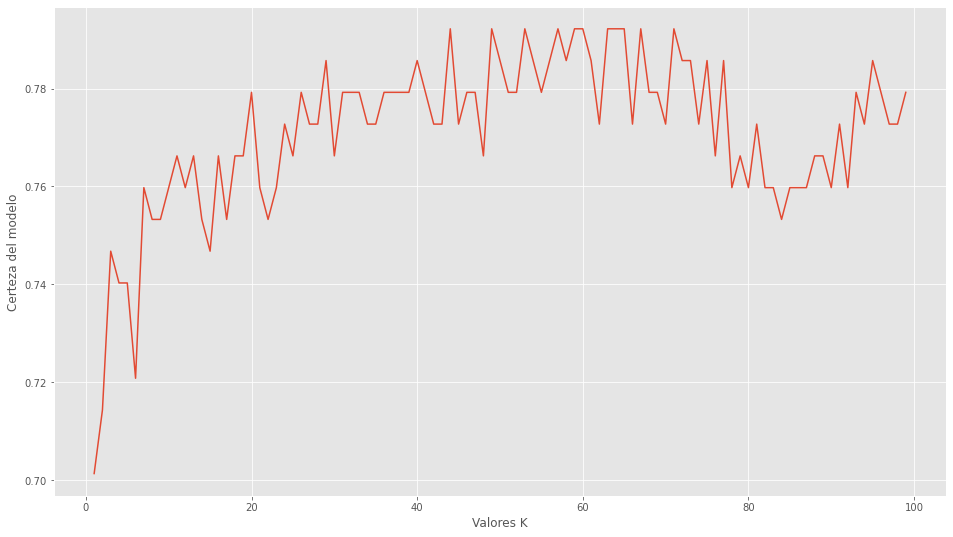

[0.7012987012987013, 0.7142857142857143, 0.7467532467532467, 0.7402597402597403, 0.7402597402597403, 0.7207792207792207, 0.7597402597402597, 0.7532467532467533, 0.7532467532467533, 0.7597402597402597, 0.7662337662337663, 0.7597402597402597, 0.7662337662337663, 0.7532467532467533, 0.7467532467532467, 0.7662337662337663, 0.7532467532467533, 0.7662337662337663, 0.7662337662337663, 0.7792207792207793, 0.7597402597402597, 0.7532467532467533, 0.7597402597402597, 0.7727272727272727, 0.7662337662337663, 0.7792207792207793, 0.7727272727272727, 0.7727272727272727, 0.7857142857142857, 0.7662337662337663, 0.7792207792207793, 0.7792207792207793, 0.7792207792207793, 0.7727272727272727, 0.7727272727272727, 0.7792207792207793, 0.7792207792207793, 0.7792207792207793, 0.7792207792207793, 0.7857142857142857, 0.7792207792207793, 0.7727272727272727, 0.7727272727272727, 0.7922077922077922, 0.7727272727272727, 0.7792207792207793, 0.7792207792207793, 0.7662337662337663, 0.7922077922077922, 0.7857142857142857,

In [32]:
k_range = range(1,100)
certeza = {}
certeza_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    y_hat = knn.predict(x_test)
    certeza[k] = metrics.accuracy_score(y_test,y_hat)
    certeza_list.append(metrics.accuracy_score(y_test,y_hat))
    
plt.plot(k_range,certeza_list)
plt.xlabel("Valores K")
plt.ylabel("Certeza del modelo")
plt.show()

print(certeza_list) #vemos que el k=5 elegido no es el que tiene la mejor certeza pero sí un nivel adecuado, por encima del 93%
#Sin embargo, es un buen estimador

In [33]:
#El modelo con más certeza es con K≈45

## Modelo de clasificación final

In [34]:
k=45
diagnostico_diabetes_pred = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train) #entrenamos el modelo
y_hat = diagnostico_diabetes_pred.predict(x_test) #lo corremos con el test de prueba

In [35]:
print(confusion_matrix(y_test, y_hat))

[[92 10]
 [25 27]]
